In [1]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Josiel1998/machine-learning/main/Datasets/RealEstate/WPB_Sold_Homes_2022.csv")
df.head(40)

,City,DateSold,Type,Price_per_thousand,SQFT,SQFT_per_thousand
0,WPB,9/2/22,Single Family,450,2049,2.049
1,WPB,9/2/22,Townhome,413,1298,1.298
2,WPB,9/2/22,Townhome,395,1737,1.737
3,RB,9/2/22,Townhome,380,1746,1.746
4,WPB,9/2/22,Single Family,305,1665,1.665
5,WPB,9/2/22,Townhome,210,1277,1.277
6,WPB,9/2/22,Apartment,166,798,0.798
7,LW,9/2/22,Single Family,1400,3334,3.334
8,G,9/2/22,Apartment,165,818,0.818
9,LW,9/2/22,Single Family,385,862,0.862


In [3]:
df.shape

(40, 6)

In [24]:
x_train = df.SQFT_per_thousand # features
y_train = df.Price_per_thousand # target value

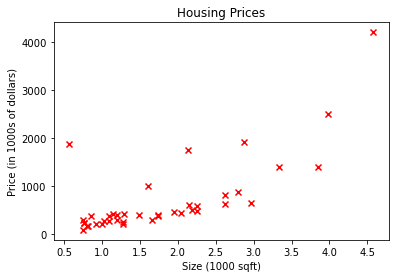

In [32]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Model function
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

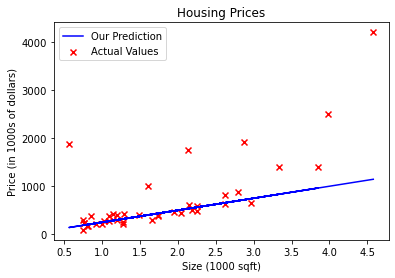

In [33]:
# model parameters
#w = 0.003
w = 250
b = 0

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Cost Function
The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [34]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [35]:
print(compute_cost(x_train, y_train, w, b))

233159.57109375


<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [57]:
# function provides the gradient i.e. the direction where the parameters should update towards based on the tangent
# line within the parabola. This uses the difference between the model predicted point and the actual value and its
# difference
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        # f_wb is the "model" based on the input "x" and the "w" and "b" parameters (1)
        f_wb = w * x[i] + b 
        # get cost of the model for each record w.r.t. weights (4) this is J (w)
        dj_dw_i = (f_wb - y[i]) * x[i] 
        # get cost of the model for each record w.r.t bias (5) this is J(b)
        dj_db_i = f_wb - y[i] 
        # get total cost for weights (2)
        dj_db += dj_db_i
        # get total cost for bias (2)
        dj_dw += dj_dw_i
        
    # the gradient of the cost w.r.t the parameters w
    dj_dw = dj_dw / m 
    # the gradient of the cost w.r.t the parameters b
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [58]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    w_history = []
    b_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw
        
        w_history.append(w)
        b_history.append(b)

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history, w_history, b_history #return w and J,w history for graphing

In [59]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist, w_hist, b_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.25e+05  dj_dw: -1.839e+03, dj_db: -7.135e+02   w:  1.839e+01, b: 7.13525e+00
Iteration 1000: Cost 1.44e+05  dj_dw: -6.225e+00, dj_db:  1.380e+01   w:  5.540e+02, b:-2.62301e+02
Iteration 2000: Cost 1.43e+05  dj_dw: -8.908e-01, dj_db:  1.975e+00   w:  5.815e+02, b:-3.23062e+02
Iteration 3000: Cost 1.43e+05  dj_dw: -1.275e-01, dj_db:  2.825e-01   w:  5.854e+02, b:-3.31756e+02
Iteration 4000: Cost 1.43e+05  dj_dw: -1.824e-02, dj_db:  4.042e-02   w:  5.859e+02, b:-3.32999e+02
Iteration 5000: Cost 1.43e+05  dj_dw: -2.609e-03, dj_db:  5.784e-03   w:  5.860e+02, b:-3.33177e+02
Iteration 6000: Cost 1.43e+05  dj_dw: -3.733e-04, dj_db:  8.276e-04   w:  5.860e+02, b:-3.33203e+02
Iteration 7000: Cost 1.43e+05  dj_dw: -5.342e-05, dj_db:  1.184e-04   w:  5.860e+02, b:-3.33207e+02
Iteration 8000: Cost 1.43e+05  dj_dw: -7.643e-06, dj_db:  1.694e-05   w:  5.860e+02, b:-3.33207e+02
Iteration 9000: Cost 1.43e+05  dj_dw: -1.094e-06, dj_db:  2.424e-06   w:  5.860e+02, b:-3.33207e+02


# Best fit model within local minima

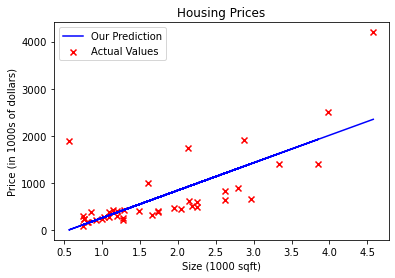

In [60]:
w = w_final
b = b_final

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

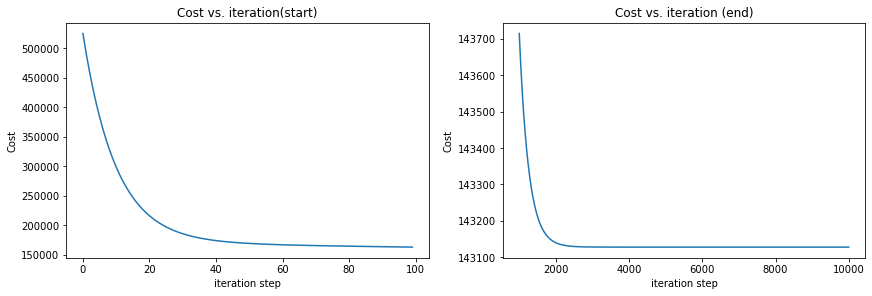

In [61]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [62]:
# predictions
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 252.8 Thousand dollars
1200 sqft house prediction 370.0 Thousand dollars
2000 sqft house prediction 838.9 Thousand dollars


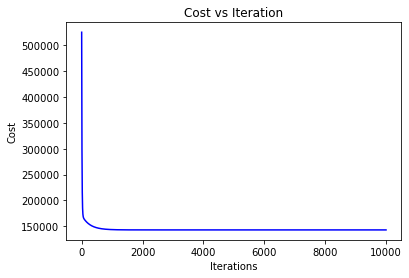

In [52]:
plt.plot(J_hist, c='b',label='Cost')
plt.title("Cost vs Iteration")
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

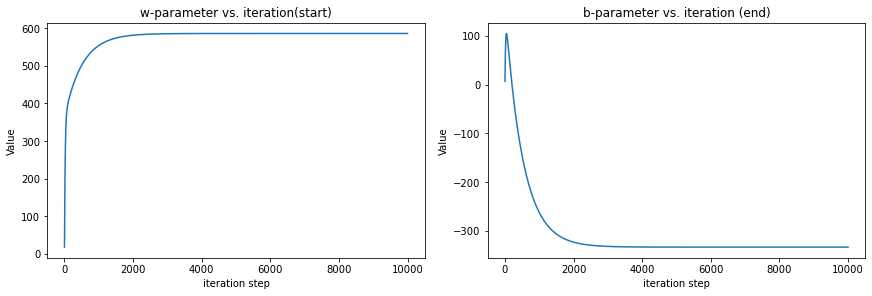

In [64]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(w_hist)
ax2.plot(b_hist)
ax1.set_title("w-parameter vs. iteration(start)");  ax2.set_title("b-parameter vs. iteration (end)")
ax1.set_ylabel('Value')            ;  ax2.set_ylabel('Value') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()